# Modelling Plant Disease

## Summary & How to Use

Agraris' supporting feature is plant disease classification which is able to predict whether the target is infected by one of the common diseases for plants or not. This model will take an input of image, and classify the image into one of 38 class.

## How to make the model?

   
### Data Preparation for Modelling

1. Augment the picture to get a better accuracy from small data pool (this process has been done before, so in this code there is no augmentation process)
2. Cast the image into a TensorFlow vector to be processed using keras.image_dataset_from_directory , as the image has been augmented before.


### Modelling Process

3. Define the model. In this scoop, the model uses 11 layers of Keras' layers. The activation function used in the model is ReLu for most of the layers, as the ReLU activation function is one of the best activation function.

   The last activation function is different (softmax) is used to do multi-class classification.

4. Define the callbacks that are going to be used. In this case, there are two callbacks that are used in this model. The first callback is the Reminder callback, which is used to get the notification that the accuracy has reached the threshold of the accuracy (in this scoop is 0.99). This callback is used to flag the "good" model, and differ it from the others.

5. Define the second callback (checkpointCB). This checkpoint is used to save the best model that this iteration has ever had. The model is stored at the model folder. This callback is used to get the best model for the prediction later, or just to simply save the model as a .h5 file to be able to be reused.

6. Compile the model. The loss used in this optimization is the sparse categorical cross-entropy (this loss is optimized for multi-class classification). To fit this model better, the Adam optimizer is used with the accuracy as the metric.

7. Fit the model with the epoch of 10.

    
### Evaluation

8. Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.
9. Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

### Model-saving

10. The last model is the best model among the epochs, so the last model is saved into a .hdf5 file to be able to be retrained, or just to load.

### Load Libraries
Load the libraries needed by using import. The libraries needed:

- Tensorflow
- OS
- Matplotlib

In [1]:
import tensorflow as tf
import os

### Data Preparation for Modelling

Before the augmented images are ready for modelling process, it has to be processed first. These steps are needed steps for modelling.

### Directory Specification

Specify the directories that are going to be used. In this scoop, there are 2 directories, the train directory (defined as train_dir) and the validation directory (val_dir).

In [2]:
base_dir = r"dataset\train_val"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "valid")

### Process the Image for Classification

this process will return a tf.data.Dataset that yields batches of images from the subdirectories, together with labels 0 and 1.

In [4]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=42,
    image_size= (150, 150),
    batch_size=100
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=42,
    image_size= (150, 150),
    batch_size=100
)

Found 17572 files belonging to 38 classes.


## Modelling Process

The modelling process is the main topic of this document, as the modelling is the part where we make a new model based on the need. These are the steps in the model which will be used in the model.

1. Define the model. In this scoop, the model uses 11 layers of Keras' Dense layer. The activation function used in the model is ReLu for most of the layers, as the ReLU activation function is one of the best activation function.

   The last activation function is different (softmax) is used to do multi-class classification.

2. Define the callbacks that are going to be used. In this case, there are two callbacks that are used in this model. The first callback is the Reminder callback, which is used to get the notification that the accuracy has reached the threshold of the accuracy (in this scoop is 0.99). This callback is used to flag the "good" model, and differ it from the others.

3. Define the second callback (checkpointCB). This checkpoint is used to save the best model that this iteration has ever had. The model is stored at the model folder. This callback is used to get the best model for the prediction later, or just to simply save the model as a .h5 file to be able to be reused.

4. Compile the model. The loss used in this optimization is the sparse categorical cross-entropy (this loss is optimized for multi-class classification). To fit this model better, the Adam optimizer is used with the accuracy as the metric.

5. Fit the model with the epoch of 10.

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.BatchNormalization(input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(38, activation= 'softmax')
])

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 150, 150, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [9]:
class Reminder(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        ACCURACY_THRESHOLD = 0.96
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD and logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nTarget reached %2.2f%%. Stop Training" %(ACCURACY_THRESHOLD*100))
            # self.model.stop_training = True

reminderCB = Reminder()

checkpoint_filepath = 'model/adams_weights.{epoch:02d}-{val_loss:.3f}.h5'
checkpointCB = tf.keras.callbacks.ModelCheckpoint(
                    filepath=checkpoint_filepath,
                    monitor='val_accuracy',
                    mode='max',
                    save_best_only=True)

In [11]:
# latih model dengan model.fit   
fitting_history = model.fit(
                      train_set,
                      epochs=10,
                      validation_data=validation_set, 
                      verbose=1,
                      callbacks = [reminderCB,checkpointCB],
                    )

Epoch 1/10
703/703 [==============================] - 1137s 2s/step - loss: 0.8901 - accuracy: 0.7383 - val_loss: 0.4274 - val_accuracy: 0.8578
Epoch 2/10
703/703 [==============================] - 1027s 1s/step - loss: 0.2913 - accuracy: 0.9070 - val_loss: 0.2894 - val_accuracy: 0.9091
Epoch 3/10
703/703 [==============================] - 1078s 2s/step - loss: 0.1761 - accuracy: 0.9408 - val_loss: 0.2084 - val_accuracy: 0.9336
Epoch 4/10
703/703 [==============================] - 1025s 1s/step - loss: 0.1146 - accuracy: 0.9610 - val_loss: 0.2362 - val_accuracy: 0.9260
Epoch 5/10
703/703 [==============================] - 1025s 1s/step - loss: 0.0908 - accuracy: 0.9692 - val_loss: 0.1780 - val_accuracy: 0.9465
Epoch 6/10
703/703 [==============================] - 1024s 1s/step - loss: 0.0824 - accuracy: 0.9722 - val_loss: 0.1701 - val_accuracy: 0.9480
Epoch 7/10
703/703 [==============================] - 1023s 1s/step - loss: 0.0726 - accuracy: 0.9754 - val_loss: 0.2100 - val_accuracy:

## Evaluation

The evaluation process is the last process in this document. This evaluation process aims to evaluate how the model works, and how the model converges through each epoch. There are to graphs going to be made, the accuracy plot, and the loss plot.

### Accuracy Plotting

Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.

In this case, the graph shows that the accuracy is increasing in both train and test set. This means that the model is well-fit.

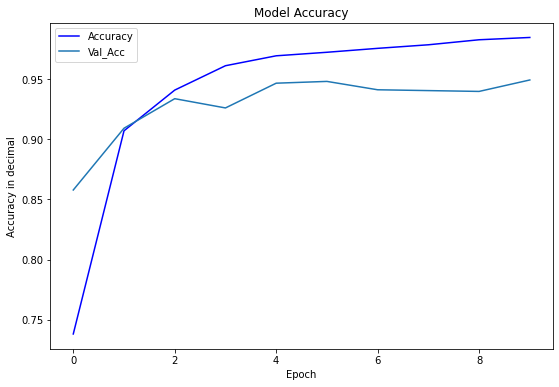

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.title('Model Accuracy')
plt.ylabel('Accuracy in decimal')
plt.xlabel('Epoch')

acc = plt.plot(fitting_history.history['accuracy'], color='blue')
val_acc = plt.plot(fitting_history.history['val_accuracy'])

plt.legend(['Accuracy', 'Val_Acc'], loc='upper left')

plt.show()

### Loss Plotting

Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

In this case, the graph shows that the loss is decreasing in both train and test set. This means that the model is well-fit.

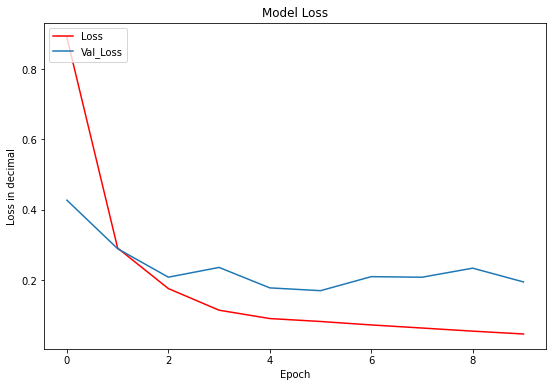

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.title('Model Loss')
plt.ylabel('Loss in decimal')
plt.xlabel('Epoch')

loss = plt.plot(fitting_history.history['loss'], color='red')
val_loss = plt.plot(fitting_history.history['val_loss'])

plt.legend(['Loss', 'Val_Loss'], loc='upper left')

plt.show()

## Model-saving

The last model is the best model among the epochs, so the last model is saved into a .hdf5 file to be able to be retrained, or just to load. To documentate the process, a TF Lite model is made too.

In [14]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\xcessive\AppData\Local\Temp\tmpuqc3iiuq\assets


In [16]:
model.save("model/model_best.hdf5")

## Conclusion

Based on the evaluation matrix (from the graph of the accuracy and the loss function), the model made was well-fit with the accuracy and the val_accuracy higher than 92.00%.
So, we can use the best model generated from this model to predict our data.